# Methode gradient Pas fix 

In [1]:
import numpy as np
from matplotlib import pyplot as plt

#Rosenbork function and it's gradient 
def rosenbork (x1, x2):
    return (x1-1)**2 + 100*(x1**2 - x2)**2

# def rosenbork_grad(x):
#     grad = np.zeros((1,2))
#     grad[0] = 400 * x[0] (x[0]**2 - x[1]) + 2 * (x[0] - 1)
#     grad[1] = 200 * (x[1] - x[0]**2)
#     return grad

#### I have change the  Grade function to prevent the  Matimaticale Error 
def rosenbork_grad(x):
    grad = np.zeros(2)
    if x[0] != 0:
        grad[0] = 400 * x[0] * (x[0]**2 - x[1]) + 2 * (x[0] - 1)
    else:
        grad[0] = 0
    if x[1] > 0:
        grad[1] = 200 * (x[1] - x[0]**2)
    else:
        grad[1] = 0

    if abs(x[0]) < 1e10:
        grad[0] = 400 * x[0] * (x[0]**2 - x[1]) + 2 * (x[0] - 1)
    else:
        grad[0] = 0
        
    return grad

# Question 1

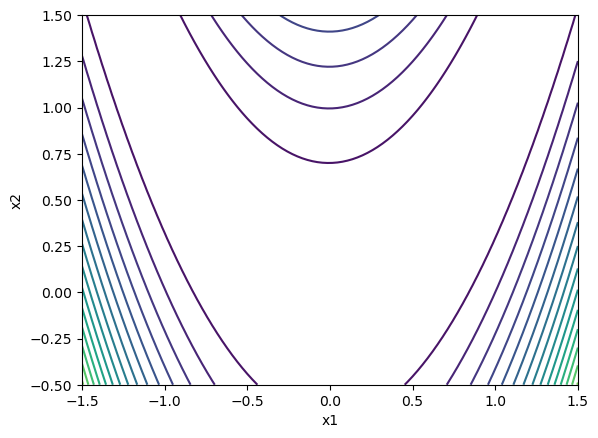

In [2]:
x1 = np.linspace(-1.5, 1.5, 100)
x2 = np.linspace(-0.5, 1.5, 100)
X1, X2 = np.meshgrid(x1, x2)

# Calculate the values of f(x1, x2) on the grid
Z = rosenbork(X1, X2)

# Use the contour function to draw the level lines of f(x1, x2)
plt.contour(X1, X2, Z, levels=np.arange(0, 1000, 50))

# Add labels and show the plot
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

# Question 2

In [3]:
# Define the fixed-step gradient method
def fixed_step_gradient_method(x0, h, max_iter,error_threshold):
    # Initialize the current point and the number of iterations
    x = x0
    
    iter = 0
    
    # Iterate until the maximum number of iterations is reached
    while iter < max_iter:
        # Calculate the gradient at the current point
        grad = rosenbork_grad(x)
        
        # Update the current point using the gradient descent algorithm
        x = x - h * grad
        
        # Calculate the error of the current point
        error = rosenbork(x[0],x[1])
        
        # Check if the error is below the threshold
        if error < error_threshold:
            break

        # Increment the number of iterations
        iter += 1
    
    # Return the final point
    return x

# Define the initial point x0 and the step size h
x0 = np.array([-0.5, 1.5])
h = 0.0001

# Set the maximum number of iterations and error threshold
max_iter = 9000
error_threshold = 1e-6


# Find the solution using the fixed-step gradient method
x = fixed_step_gradient_method(x0, h, max_iter,error_threshold)

# Print the final point
print(x)

[0.16818009 0.02583494]


we almoste get [1,1]

# Question 3
Here are two examples of stopping criteria that can be used in the fixed-step gradient method:

Maximum number of iterations: This stopping criterion specifies a maximum number of iterations that the algorithm should perform before stopping. This criterion can be useful for preventing the algorithm from running indefinitely, but it may also cause the algorithm to stop before it has fully converged to a solution.

Minimum error threshold: This stopping criterion specifies a minimum error threshold that the algorithm should aim to achieve. When the error of the algorithm falls below the threshold, the algorithm stops and converges to a solution. This criterion can be useful for ensuring that the algorithm achieves a certain level of accuracy, but it may also cause the algorithm to stop prematurely if the error threshold is set too low.

we've already implement those solution in previous answer 

# Question 4

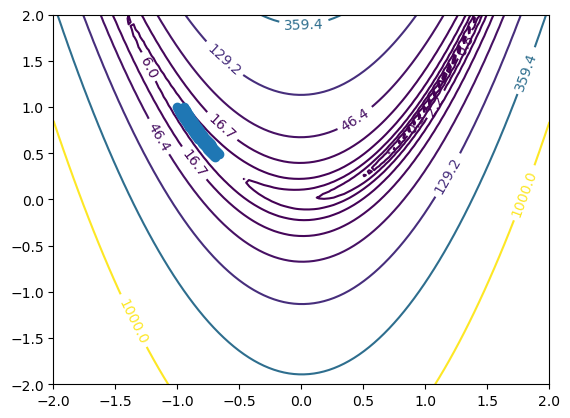

In [4]:
# Define the fixed-step gradient method using the normalized gradient
def fixed_step_gradient_method(f, grad_f, x0, h):
    x = x0
    x_iterates = [x]
    for i in range(100):
        # Calculate the gradient at the current point
        grad = grad_f(x)
        
        # Calculate the norm of the gradient
        grad_norm = np.linalg.norm(grad)
        
        # Update the current point using the normalized gradient
        x = x - h * grad / grad_norm
        
        # Store the current point
        x_iterates.append(x)
    
    return x_iterates

# Set the starting point and step size
x0 = np.array([-1, 1])
h = 0.05

# Minimize the Rosenbrock function using the fixed-step gradient method
x_iterates = fixed_step_gradient_method(rosenbork, rosenbork_grad, x0, h)

# Create a grid of x1 and x2 values
x1 = np.linspace(-2, 2, 100)
x2 = np.linspace(-2, 2, 100)
X1, X2 = np.meshgrid(x1, x2)

# Calculate the value of the Rosenbrock function on the grid
Z = rosenbork(X1,X2)
# Create the contour plot
fig, ax = plt.subplots()
contours = ax.contour(X1, X2, Z, levels=np.logspace(-1, 3, 10))
ax.clabel(contours)

# Overlay the iterates on the contour plot
ax.plot(np.array(x_iterates)[:,0], np.array(x_iterates)[:,1], '-o')

# Show the plot
plt.show()


# Question 5

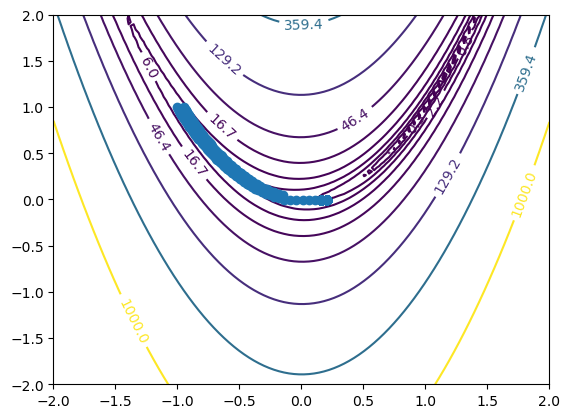

In [5]:
def fixed_step_gradient_method_with_stopping_criteria(f, grad_f, x0, h, eps=1e-6, max_iter=1000, f_tol=1e-6):
    # Initialize the iteration counter
    i = 0
    
    # Set the current point to the starting point
    x = x0
    
    # Initialize a list to store the iterates
    iterates = []
    
    # Run the loop until one of the stopping criteria is met
    while True:
        # Append the current point to the list of iterates
        iterates.append(x)
        
        # Calculate the gradient at the current point
        grad = grad_f(x)
        
        # Calculate the norm of the gradient
        grad_norm = np.linalg.norm(grad)
        
        # Check the first stopping criterion: if the norm of the gradient is less than eps, stop the loop
        if grad_norm < eps:
            break
        
        # Update the current point using the normalized gradient
        x = x - h * grad / grad_norm
        
        # Increment the iteration counter
        i += 1
        
        # Check the second stopping criterion: if the iteration counter is greater than max_iter, stop the loop
        if i > max_iter:
            break
        
        # Check the third stopping criterion: if the value of the function at the current point is less than f_tol, stop the loop
        if f(x[0],x[1]) < f_tol:
            break
    
    # Return the list of iterates
    return iterates


# Set the starting point and step size
x0 = np.array([-1, 1])
h = 0.05

# Minimize the Rosenbrock function using the fixed-step gradient method
x_iterates = fixed_step_gradient_method_with_stopping_criteria(rosenbork, rosenbork_grad, x0, h)

# Create a grid of x1 and x2 values
x1 = np.linspace(-2, 2, 100)
x2 = np.linspace(-2, 2, 100)
X1, X2 = np.meshgrid(x1, x2)

# Calculate the value of the Rosenbrock function on the grid
Z = rosenbork(X1,X2)
# Create the contour plot
fig, ax = plt.subplots()
contours = ax.contour(X1, X2, Z, levels=np.logspace(-1, 3, 10))
ax.clabel(contours)

# Overlay the iterates on the contour plot
ax.plot(np.array(x_iterates)[:,0], np.array(x_iterates)[:,1], '-o')

# Show the plot
plt.show()


# Question 6

In [6]:
def nesterov_method(f, grad_f, x0, h, max_iter=1000, eps=1e-6):
    # Initialize the iteration counter
    i = 0
    
    # Set the current point to the starting point
    x = x0
    
    # Initialize the momentum term
    mu = 0.9
    
    # Initialize the previous update to zero
    prev_update = np.zeros_like(x)
    
    # Initialize a list to store the iterates
    iterates = []
    
    # Run the loop until the maximum number of iterations is reached
    while i < max_iter:
        # Append the current point to the list of iterates
        iterates.append(x)
        
        # Calculate the gradient at the lookahead point
        lookahead = x - mu*prev_update
        grad = grad_f(lookahead)
        
        # Update the previous update
        prev_update = -h * grad
        
        # Update the current point
        x = x + prev_update
        
        # Check the stopping criterion
        if np.linalg.norm(grad) < eps:
            break
        
        # Increment the iteration counter
        i += 1
    
    # Return the list of iterates
    return iterates

# Set the initial point
x0 = np.array([-1.2, 1])

# Set the step size
h = 0.1

# Set the maximum number of iterations
max_iter = 1000

# Set the tolerance
eps = 1e-6

# Run the optimization
iterates = nesterov_method(rosenbork, rosenbork_grad, x0, h, max_iter, eps)

# Print the final point
print("Final point:", iterates[-1])


Final point: [ 6.60571062e+15 -1.45305925e+34]


# Question 7

In [7]:

def rosenbrock(x):
    return (x[0]-1)**2 + 100*(x[0]**2 - x[1])**2


# Define the Rastrigin function
def rastrigin(x):
    n = len(x)
    return 10*n + sum([(x[i]**2 - 10*np.cos(2*np.pi*x[i])) for i in range(n)])

# Define the gradient of the Rastrigin function
def grad_rastrigin(x):
    n = len(x)
    grad = np.zeros(n)
    for i in range(n):
        grad[i] = 2*x[i] + 20*np.pi*np.sin(2*np.pi*x[i])
    return grad

# Set the initial point
x0 = np.array([1.0, 1.0])

# Set the step size
h = 0.1

# Set the maximum number of iterations
max_iter = 1000

# Set the tolerance
eps = 1e-6

# Run the optimization
iterates = nesterov_method(rastrigin, grad_rastrigin, x0, h, max_iter, eps)

# Print the final point
print("Final point:", iterates[-1])


Final point: [-6.41405664 -6.41405664]


# Armijo Rule

### Question 1

In [8]:
def rosenbrock(x):
    return (x[0]-1)**2 + 100*(x[0]**2 - x[1])**2
# Define the gradient of the Rosenbrock function
def grad_rosenbrock(x):
    grad = np.zeros(2)
    grad[0] = 2*(x[0]-1) + 400*x[0]*(x[0]**2-x[1])
    grad[1] = -200*(x[0]**2-x[1])
    return grad

def gradient_descent_with_armijo_rule(f, grad_f, x0, alpha, c=0.1, sigma=0.5, max_iter=1000, eps=1e-6):
    # Initialize the iteration counter
    i = 0
    
    # Set the current point to the starting point
    x = x0
    
    # Initialize a list to store the iterates
    iterates = []
    
    # Run the loop until the maximum number of iterations is reached
    while i < max_iter:
        # Append the current point to the list of iterates
        iterates.append(x)
        
        # Calculate the gradient at the current point
        grad = grad_f(x)
        
        # Calculate the search direction
        d = -grad
        
        # Check the Armijo rule
        while f(x + alpha * d) > f(x) + c * alpha * grad.T.dot(d):
            # Reduce the step size
            alpha = alpha * sigma
            
        # Update the current point
        x = x + alpha * d
        
        # Check the stopping criterion
        if np.linalg.norm(grad) < eps:
            break
        
        # Increment the iteration counter
        i += 1
    
    # Return the list of iterates
    return iterates

# Set the initial point
x0 = np.array([-1.2, 1])

# Set the initial step size
alpha = 0.1

# Set the Armijo rule parameters
c = 0.1
sigma = 0.5

# Set the maximum number of iterations
max_iter = 1000

# Set the tolerance
eps = 1e-6

# Run the optimization
iterates = gradient_descent_with_armijo_rule(rosenbrock, grad_rosenbrock, x0, alpha, c, sigma, max_iter, eps)

# Print the final point
print("Final point:", iterates[-1])

Final point: [0.01399574 0.00010152]


In [9]:
# Set the initial point
x0 = np.array([1.0, 1.0])

# Set the initial step size
alpha = 0.1

# Set the Armijo rule parameters
c = 0.1
sigma = 0.5

# Set the maximum number of iterations
max_iter = 1000

# Set the tolerance
eps = 1e-6

# Run the optimization
iterates = gradient_descent_with_armijo_rule(rastrigin, grad_rastrigin, x0, alpha, c, sigma, max_iter, eps)

# Print the final point
print("Final point:", iterates[-1])

Final point: [0.99495864 0.99495864]
